## 평균 제곱 오차 구현

In [40]:
import numpy as np
from PIL import Image
%matplotlib inline

def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [6]:
# 정답 : 2
t = [0,0,1,0,0,0,0,0,0,0]

# ex : 2일 확률이 높다고 추정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

## 교차 엔트로피 오차 구현

In [8]:
def cross_entropy_error(y,t):
    delta = 1e-7 # 0이 되지 않게 delta값 임의 생성
    return -np.sum(t*np.log(y+delta))

In [10]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

## 미니배치 학습 - MNIST

In [13]:
from mnist import load_mnist
from PIL import Image

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True) # one-hot encoding : 정답인 부분만 1

print(x_train.shape) # 60000,784
print(t_train.shape) # 60000

(60000, 784)
(60000, 10)


In [14]:
#임의로 10장만 뽑기
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [16]:
# 배치용 교차 엔트로피
def cross_entropy_error_bat(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arrange(batch_size), t])) / batch_size

## 미분 : 수치미분으로 구현 시 계단 함수 형태가 됨.

In [27]:
# 수치미분
def numerical_diff_origin(f,x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

# 두 개의 점선을 적용 시 수치미분
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h) / (2*h))

## 수치 미분과 편미분

### 수치 미분 : 일반 미분

In [18]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

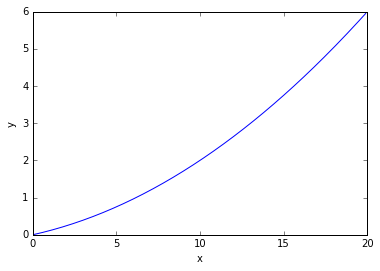

In [21]:
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x) 
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.show()

### 편미분 : 수식에서 한 부분만 미분할 때 사용

In [29]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [30]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [31]:
numerical_diff(function_tmp1, 3.0)

-124971.99944998999

## 기울기

In [82]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [36]:
numerical_gradient(function_2, np.array([3.0,4.0]))

array([ 6.,  8.])

## 경사 하강법

In [37]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x

In [38]:
init_x= np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

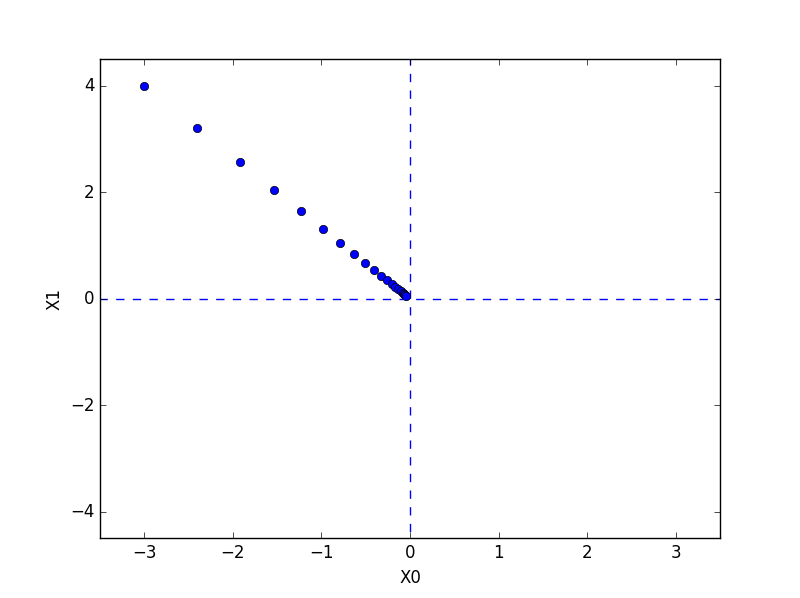

In [42]:
Image.open('gradient_method.png')

In [48]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x , lr=10.0, step_num= 100) # 학습률이 너무 큰 예 : lr=10.0

array([ -2.58983747e+13,  -1.29524862e+12])

In [52]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x , lr=1e-10, step_num= 100) # 학습률이 너무 작은 예 : lr=1e-10

array([-2.99999994,  3.99999992])

In [53]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## 신경망 에서의 기울기

In [61]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x,self.W)
    
    def loss(self, x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [62]:
net = simpleNet()

In [63]:
print(net.W)

[[-1.4615277  -0.55329959 -0.42440944]
 [ 0.64501235  0.78274546  0.49316614]]


In [79]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(x)

[ 0.6  0.9]


In [65]:
np.argmax(p)

1

In [66]:
t = np.array([0,0,1])
net.loss(x,t)

1.0354881541103853

In [83]:
def f(W): # 더미함수
    return net.loss(x,t)

dW = numerical_gradient(f,net.W) # net의 결과로 나온 가중치를 통한 기울기
print(dW)

[[ 0.13108311  0.25588503 -0.38696814]
 [ 0.19662467  0.38382754 -0.58045221]]


## 학습 알고리즘 최종 구현

In [85]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [87]:
net_2 = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net_2.params['W1'].shape)
print(net_2.params['b1'].shape)
print(net_2.params['W2'].shape)
print(net_2.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [90]:
x = np.random.rand(100,784)
t = np.random.rand(100,10)

grads = net_2.numerical_gradient(x,t)